In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Basic Tasks

#  Task 1 : Implement a Simple Linear Regression 

Coefficient(slope): [0.85]
Intercept: -0.49999999999999956
predicted importance/time given to a course of 5 credit hours: [3.75]


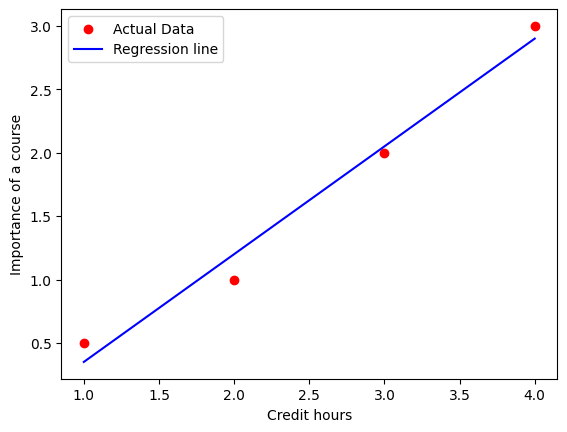

In [2]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#create a dataset where x represents the imput (course's credit hours) and y represents output (importance/time given to a course)
x = np.array([[1], [2], [3], [4]])
y = np.array([1/2, 1, 2, 3])

#create model object
model = LinearRegression()
#train the model and fit it to dataset
model.fit(x,y)

#getting the line equation y = (slope)*x+intercept
print("Coefficient(slope):", model.coef_)
print("Intercept:", model.intercept_)

#predictions made by the model
new_credit_hrs = np.array([[5]])
predicted_importance = model.predict(new_credit_hrs)
print("predicted importance/time given to a course of 5 credit hours:", predicted_importance)

#plot the data and regression line
plt.scatter(x, y, color='red', label='Actual Data')
plt.plot(x, model.predict(x), color='blue', label='Regression line')
plt.xlabel("Credit hours")
plt.ylabel("Importance of a course")
plt.legend()
plt.show()

# Task 2 : Classify Data with a Decision Tree

Model Accuracy: 100.0 %
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


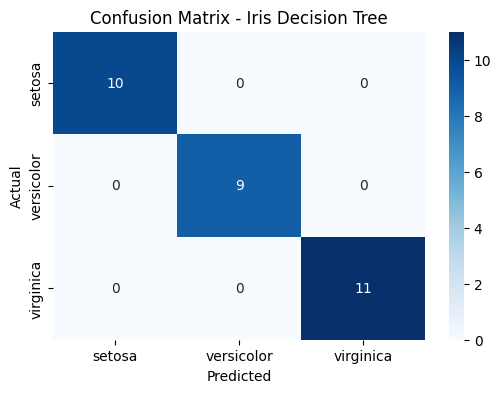

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualization of confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Iris Decision Tree")
plt.show()


# Task 3 : Visualize Data with a Scatter Plot

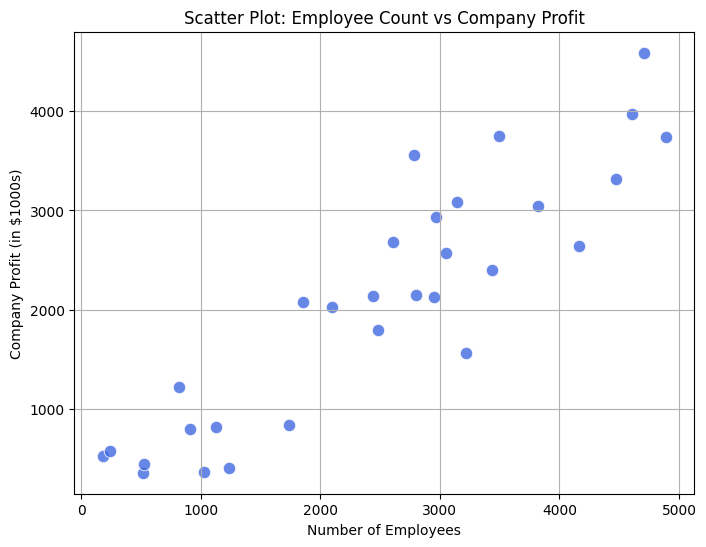

Correlation coefficient between Employee Count and Profit: 0.907


In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1️⃣ Create sample data ---
np.random.seed(42)

# Suppose we have data for 30 companies
employee_count = np.random.randint(50, 5000, size=30)  # number of employees
# Let's assume profit increases with employee count but with some randomness
profit = 0.8 * employee_count + np.random.normal(0, 500, size=30)

# Create DataFrame
company_data = pd.DataFrame({
    'Employee_Count': employee_count,
    'Profit': profit
})

# --- 2️⃣ Scatter plot ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=company_data,
    x='Employee_Count',
    y='Profit',
    color='royalblue',
    s=80,
    alpha=0.8
)
plt.title("Scatter Plot: Employee Count vs Company Profit")
plt.xlabel("Number of Employees")
plt.ylabel("Company Profit (in $1000s)")
plt.grid(True)
plt.show()

# --- 3️⃣ Correlation Analysis ---
correlation = company_data['Employee_Count'].corr(company_data['Profit'])
print(f"Correlation coefficient between Employee Count and Profit: {correlation:.3f}")


# Intermediate tasks

# Task 1 : Build a Model with Cross-Validation

In [5]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# --- 1️⃣ Load dataset ---
iris = load_iris()
X, y = iris.data, iris.target

# For binary classification example, use only two classes
X, y = X[y != 2], y[y != 2]  # Keep only class 0 and 1

# --- 2️⃣ Define model ---
model = LogisticRegression(max_iter=200)

# --- 3️⃣ Define k-fold cross-validation ---
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# --- 4️⃣ Evaluate with accuracy ---
accuracy_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# --- 5️⃣ Evaluate with F1-score ---
f1 = make_scorer(f1_score)
f1_scores = cross_val_score(model, X, y, cv=kfold, scoring=f1)

# --- 6️⃣ Display results ---
print("Accuracy scores for each fold:", accuracy_scores)
print("Mean Accuracy: %.3f ± %.3f" % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print()
print("F1 scores for each fold:", f1_scores)
print("Mean F1 Score: %.3f ± %.3f" % (np.mean(f1_scores), np.std(f1_scores)))


Accuracy scores for each fold: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.000 ± 0.000

F1 scores for each fold: [1. 1. 1. 1. 1.]
Mean F1 Score: 1.000 ± 0.000


# Task 2 : Preprocess Data for Machine Learning

In [6]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 2: Load Titanic dataset
# You can also use seaborn to load it if not locally available
import seaborn as sns
data = sns.load_dataset('titanic')

# Step 3: Select relevant features and target
# We'll predict 'survived' based on a few key columns
data = data[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]

# Separate features and target
X = data.drop('survived', axis=1)
y = data['survived']

# Step 4: Identify numerical and categorical columns
num_features = ['age', 'fare']
cat_features = ['pclass', 'sex', 'embarked']

# Step 5: Create pipelines for each type of data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),   # Fill missing numeric values with mean
    ('scaler', StandardScaler())                   # Normalize numeric features
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    # Encode categorical features
])

# Step 6: Combine both pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Step 7: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 8: Fit and transform the data
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Step 9: Display results
print("Shape before preprocessing:", X.shape)
print("Shape after preprocessing:", X_train_prepared.shape)
print("Sample of transformed data (first 5 rows):")
print(X_train_prepared[:5])


Shape before preprocessing: (891, 5)
Shape after preprocessing: (712, 10)
Sample of transformed data (first 5 rows):
[[ 1.2322632  -0.07868358  1.          0.          0.          0.
   1.          0.          0.          1.        ]
 [-0.50048197 -0.37714494  0.          1.          0.          0.
   1.          0.          0.          1.        ]
 [ 0.1926161  -0.47486697  0.          0.          1.          0.
   1.          0.          0.          1.        ]
 [-0.26944928 -0.47623026  0.          0.          1.          0.
   1.          0.          0.          1.        ]
 [-1.8096672  -0.02524937  0.          0.          1.          1.
   0.          0.          0.          1.        ]]


# Task 3 : Create a Classification Report

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 2: Load Titanic dataset
data = sns.load_dataset('titanic')

# Select relevant columns
data = data[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]

# Step 3: Split features (X) and target (y)
X = data.drop('survived', axis=1)
y = data['survived']

# Step 4: Identify numerical and categorical features
num_features = ['age', 'fare']
cat_features = ['pclass', 'sex', 'embarked']

# Step 5: Build preprocessing pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 7: Build a full pipeline with preprocessing + model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Step 8: Train the model
model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = model.predict(X_test)

# Step 10: Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



# Report of training classification model

| Metric        | Meaning                                                     | Ideal Value |
| ------------- | ----------------------------------------------------------- | ----------- |
| **Precision** | Out of all predicted positives, how many were correct?      | Close to 1  |
| **Recall**    | Out of all actual positives, how many did the model detect? | Close to 1  |
| **F1-score**  | Harmonic mean of precision & recall (balance of both)       | Close to 1  |
| **Support**   | Number of instances for each class                          | —           |


# Expert tasks: 

# Task 1 : Develop a Neural Network for Classification

2025-11-29 17:32:57.858622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764437578.045963      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764437578.100124      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1764437590.215180      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/10


I0000 00:00:1764437593.088152      61 service.cc:148] XLA service 0x7919f8006040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764437593.088610      61 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1764437593.272687      61 cuda_dnn.cc:529] Loaded cuDNN version 90300


  77/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4857 - loss: 1.6520

I0000 00:00:1764437593.899711      61 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8626 - loss: 0.4653 - val_accuracy: 0.9668 - val_loss: 0.1153
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9641 - loss: 0.1148 - val_accuracy: 0.9712 - val_loss: 0.0978
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9772 - loss: 0.0751 - val_accuracy: 0.9755 - val_loss: 0.0830
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9821 - loss: 0.0565 - val_accuracy: 0.9782 - val_loss: 0.0822
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0383 - val_accuracy: 0.9742 - val_loss: 0.0892
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9896 - loss: 0.0318 - val_accuracy: 0.9768 - val_loss: 0.0869
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9916 - loss: 0.0253 - val_accuracy: 0.9728 - val_loss: 0.0974
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9926 - loss: 0.0214 - val_accurac

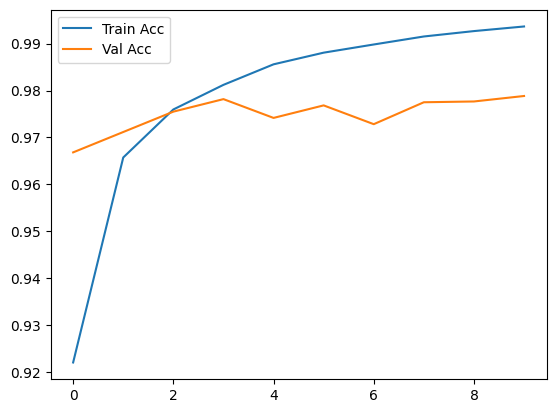

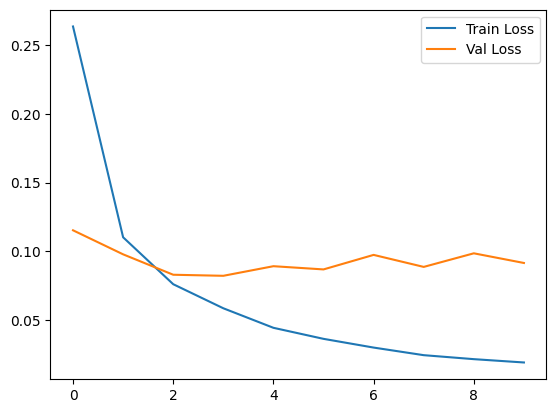

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# -------------------------------
# 1. Load MNIST dataset
# -------------------------------
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# -------------------------------
# 2. Preprocess the data
# -------------------------------

# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten 28x28 images → 784 features
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# -------------------------------
# 3. Build the neural network
# -------------------------------

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')   # 10 classes (0–9)
])

# -------------------------------
# 4. Compile the model
# -------------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -------------------------------
# 5. Train the model
# -------------------------------
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# -------------------------------
# 6. Evaluate on test set
# -------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


# Task 2 : Implement Hyperparameter Tuning

In [9]:
# ==========================================================
# Hyperparameter Optimization using GridSearchCV & RandomizedSearchCV
# ==========================================================

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# ----------------------------------------
# Step 1: Load dataset
# ----------------------------------------
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------------------
# Step 2: Define model
# ----------------------------------------
rf = RandomForestClassifier(random_state=42)

# ----------------------------------------
# Step 3: Define hyperparameter grid
# ----------------------------------------
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# ----------------------------------------
# Step 4: Grid Search (exhaustive)
# ----------------------------------------
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='f1_macro'
)
grid_search.fit(X_train, y_train)

print("\n✅ Best parameters found (Grid Search):")
print(grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("\nClassification Report (Grid Search Best Model):")
print(classification_report(y_test, y_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# ----------------------------------------
# Step 5: Randomized Search (faster alternative)
# ----------------------------------------
param_dist = {
    'n_estimators': np.arange(50, 301, 50),
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 5),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,         # number of random combinations to try
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    scoring='f1_macro'
)
random_search.fit(X_train, y_train)

print("\n✅ Best parameters found (Randomized Search):")
print(random_search.best_params_)
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

# Evaluate on test set
best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_test)
print("\nClassification Report (Randomized Search Best Model):")
print(classification_report(y_test, y_pred_random))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_random):.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ Best parameters found (Grid Search):
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9571

Classification Report (Grid Search Best Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Test Accuracy: 1.0000
Fitting 5 folds for each of 10 candidates, totalling 50 fits

✅ Best parameters found (Randomized Search):
{'n_estimators': 250, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
Best cross-validation score: 0.9491

Classification Report (Randomized Search Best Model